**Discretización de la ecuación de Burger 2D:**

Las ecuación de Burger 2D por componentes es:

* $$\dfrac{∂u}{∂t}+ u \dfrac{∂u}{∂x} + v \dfrac{∂u}{∂y} = ν \left( \dfrac{\partial^{2}u}{∂x^2} + \dfrac{∂^2u}{∂y^2}\right)$$

* $$\dfrac{∂v}{∂t}+ u \dfrac{∂v}{∂x} + v \dfrac{∂v}{∂y} = ν \left( \dfrac{\partial^{2}v}{∂x^2} + \dfrac{∂^2v}{∂y^2}\right)$$

- $u$ y $v$ son las componentes del campo de velocidades.

- $ν$ es el coeficiente de viscosidad. Controla la cantidad de difusión o disipación.

- Las derivadas espaciales, son el término convectivo no lineal.

- El laplaciano es el término difusivo.



La derivada temporal se puede discretizar de la siguiente manera:

$$\dfrac{∂u}{\partial t} ≈ \dfrac{u_{i,j}^{n+1} - u_{i,j}^{n}}{Δt}$$

Las derivadas espaciales:

$$\dfrac{∂u}{∂x} ≈ \dfrac{u_{i,j}^{n} - u_{i-1,j}^{n}}{Δx}$$

$$\dfrac{∂u}{∂y} ≈ \dfrac{u_{i,j}^{n} - u_{i,j-1}^{n}}{Δy}$$

El Laplaciano:

$$\dfrac{∂^2u}{∂x^2} ≈ \dfrac{u_{i+1,j}^{n} -2u_{i,j}^{n} + u_{i-1,j}^{n}}{Δ x^2}$$

$$\dfrac{∂^2u}{∂y^2} ≈ \dfrac{u_{i,j+1}^{n} -2u_{i,j}^{n} + u_{i,j-1}^{n}}{Δ y^2}$$


La ecuación queda completamente discretizada de la siguiente manera:


$$\dfrac{u_{i,j}^{n+1} - u_{i,j}^{n}}{Δt}+ u_{i,j}^{n} \dfrac{u_{i,j}^{n} - u_{i-1,j}^{n}}{Δx} + v_{i,j}^{n} \dfrac{u_{i,j}^{n} - u_{i,j-1}^{n}}{Δy} = ν \left( \dfrac{u_{i+1,j}^{n} -2u_{i,j}^{n} + u_{i-1,j}^{n}}{Δ x^2} + \dfrac{u_{i,j+1}^{n} -2u_{i,j}^{n} + u_{i,j-1}^{n}}{Δ y^2}  \right)$$

Despejando para $u_{i,j}^{n+1}$:

$$u_{i,j}^{n+1}=u_{i,j}^{n}-\dfrac{Δt}{Δx}u_{i,j}^{n} (u_{i,j}^{n}-u_{i-1,j}^{n}) - \dfrac{Δt}{Δy}v_{i,j}^{n}(u_{i,j}^{n}-u_{i,j-1}^{n}) + ν \dfrac{Δt}{Δx^2} (u_{i+1,j}^{n} - 2 u_{i,j}^{n}+u_{i-1,j}^{n}) + ν \dfrac{Δt}{Δy^2} (u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n})$$

De forma equivalente para la componente $v$ del campo de velocidades.



In [ ]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
###variable declarations
nx = 40
ny = 40
nt = 499
c = 1.
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nu = 0.1 #0.01
dt = 0.001 #sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))


##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 5
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 5

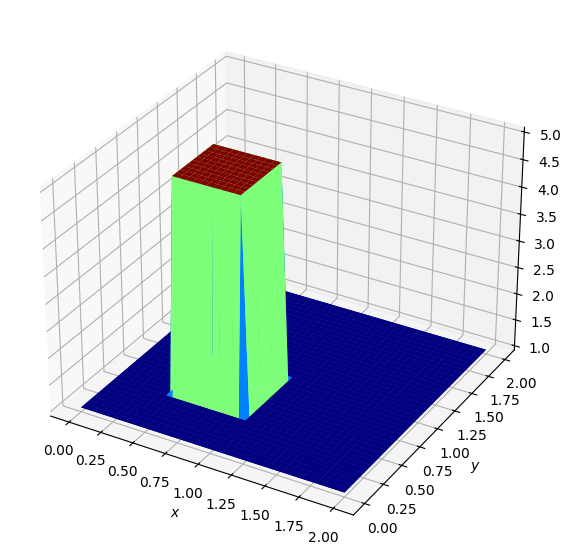

In [ ]:
###(plot ICs)
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.jet, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

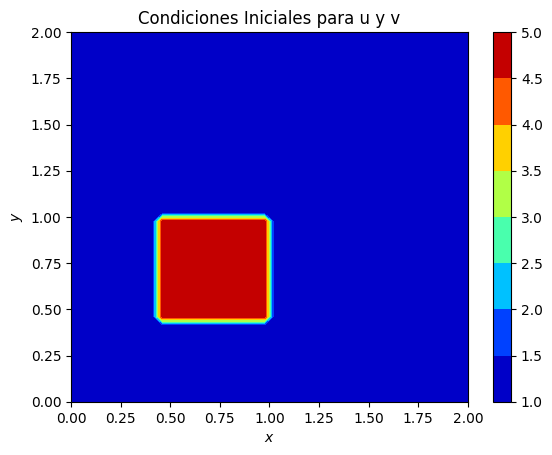

In [ ]:
# Contour plot for u
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, u[:], cmap=cm.jet)
fig.colorbar(contour)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Condiciones Iniciales para u y v')
plt.savefig('cond_ini_mdf.jpg')
plt.show()

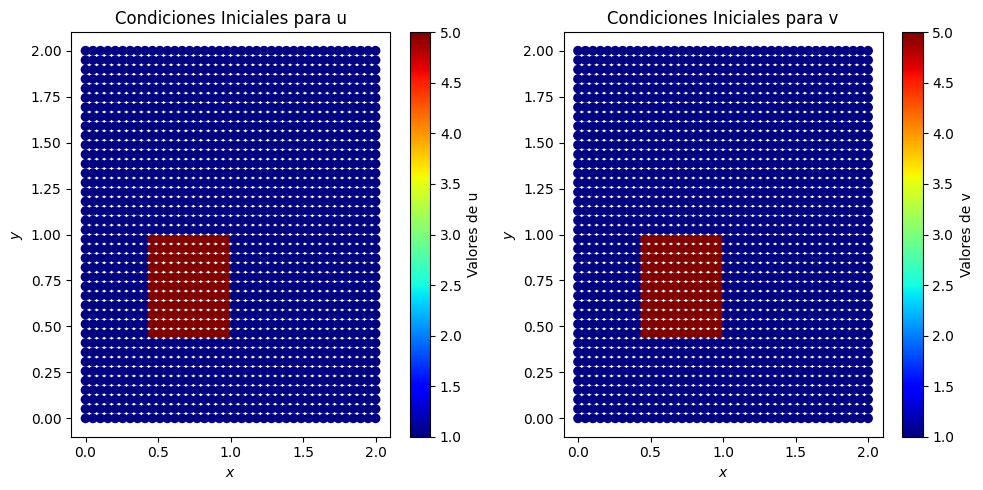

In [ ]:
# Create subplots for u and v
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for u
s0=axes[0].scatter(X, Y, c=u, cmap=cm.jet)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Condiciones Iniciales para u')
fig.colorbar(s0, ax=axes[0], label="Valores de u")

# Scatter plot for v
s1= axes[1].scatter(X, Y, c=v, cmap=cm.jet)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_title('Condiciones Iniciales para v')
fig.colorbar(s1, ax=axes[1], label="Valores de v")

plt.tight_layout() # Adjusts spacing between subplots
plt.savefig('cond_ini_scatter.jpg') # Save the figure
plt.show()

In [ ]:
u_tiempo = np.zeros((nt+1,nx,ny))
v_tiempo = np.zeros((nt+1,nx,ny))

In [ ]:
np.shape(u_tiempo)

(500, 40, 40)

In [ ]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] *
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] *
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) +
                     nu * dt / dx**2 *
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) +
                     nu * dt / dx**2 *
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    u_tiempo[n] = u.copy()
    v_tiempo[n] = v.copy()

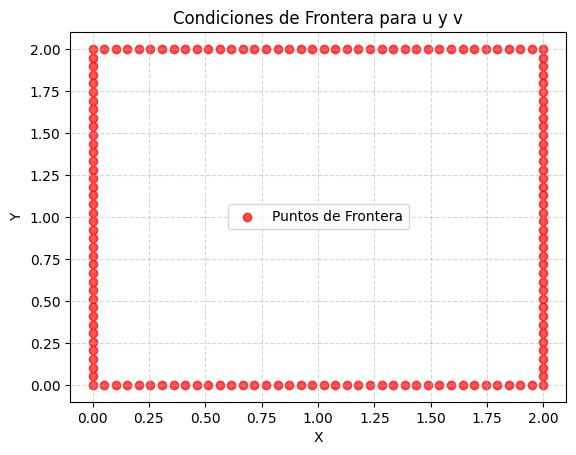

In [ ]:
border_points_x = []
border_points_y = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if i == 0 or i == X.shape[0]-1 or j == 0 or j == X.shape[1]-1:  # Condiciones de frontera
            border_points_x.append(X[i, j])
            border_points_y.append(Y[i, j])

# Crear la gráfica scatter
#plt.figure(figsize=(5, 5))
plt.scatter(border_points_x, border_points_y, color='red', label='Puntos de Frontera', alpha=0.7)

# Personalizar la gráfica
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Condiciones de Frontera para u y v')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('cond_frontera_mdf.jpg')
# Mostrar la gráfica
plt.show()

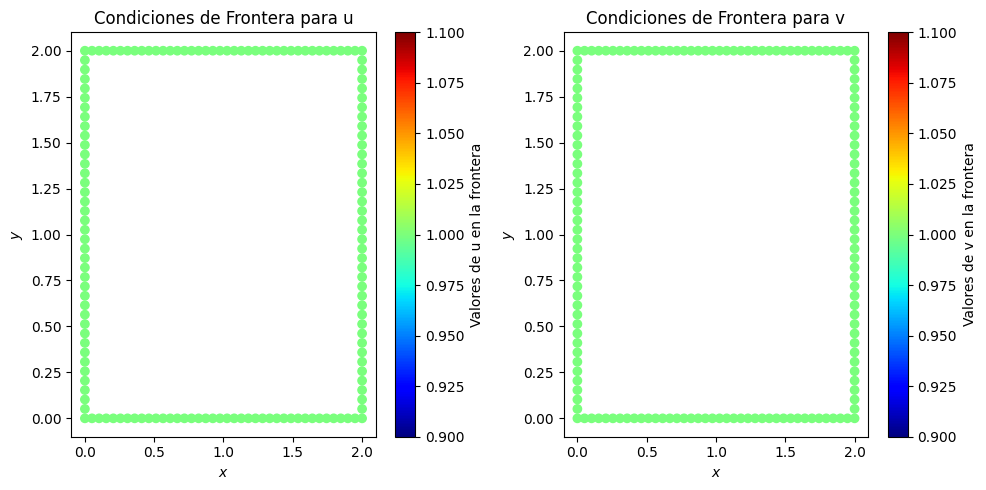

In [ ]:
# Create subplots for u and v boundary conditions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for u boundary conditions
s0 = axes[0].scatter(border_points_x, border_points_y, c=[u[i,j] for i in range(X.shape[0]) for j in range(X.shape[1]) if i == 0 or i == X.shape[0]-1 or j == 0 or j == X.shape[1]-1], cmap=cm.jet)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Condiciones de Frontera para u')
fig.colorbar(s0, ax=axes[0], label="Valores de u en la frontera")


# Scatter plot for v boundary conditions
s1 = axes[1].scatter(border_points_x, border_points_y, c=[v[i,j] for i in range(X.shape[0]) for j in range(X.shape[1]) if i == 0 or i == X.shape[0]-1 or j == 0 or j == X.shape[1]-1], cmap=cm.jet)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_title('Condiciones de Frontera para v')
fig.colorbar(s1, ax=axes[1], label="Valores de v en la frontera")


plt.tight_layout()
plt.savefig('cond_frontera_uv.jpg')
plt.show()


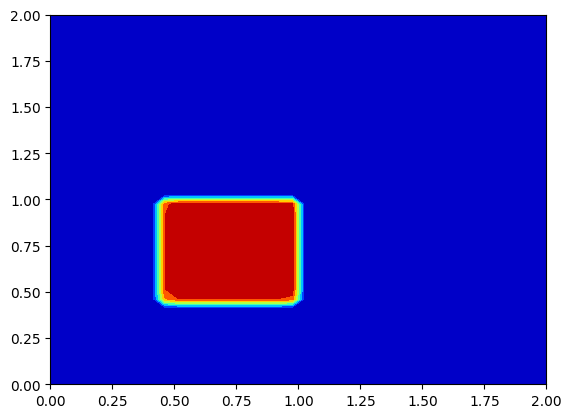

In [ ]:
#nx = 50
#ny = 20
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

X, Y = np.meshgrid(x, y)
contour= plt.contourf(X,Y,u_tiempo[0],cmap='jet')


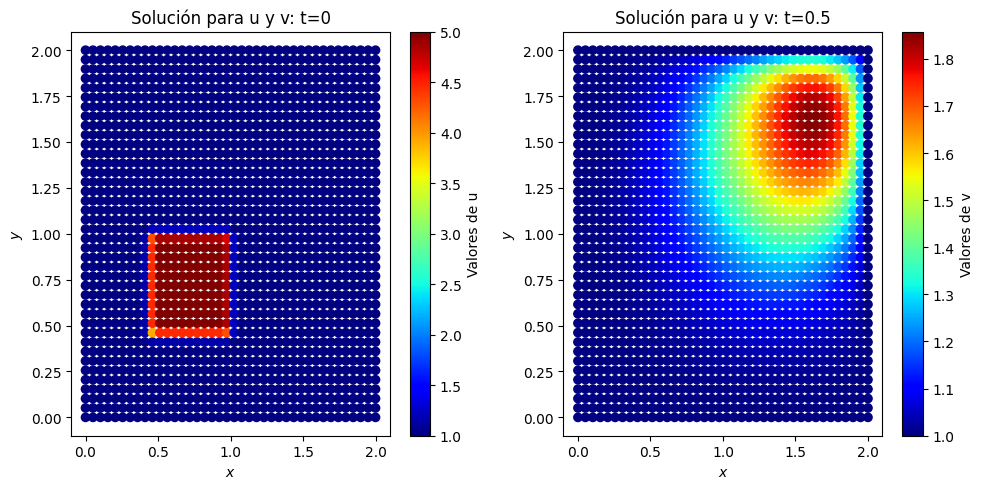

In [ ]:
# Create subplots for u and v
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for u
s0=axes[0].scatter(X, Y, c=u_tiempo[0], cmap=cm.jet)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('Solución para u y v: t=0')
fig.colorbar(s0, ax=axes[0], label="Valores de u")

# Scatter plot for v
s1= axes[1].scatter(X, Y, c=u_tiempo[498], cmap=cm.jet)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_title('Solución para u y v: t=0.5')
fig.colorbar(s1, ax=axes[1], label="Valores de v")

plt.tight_layout() # Adjusts spacing between subplots
plt.savefig('sol_burger_mdf.jpg') # Save the figure
plt.show()

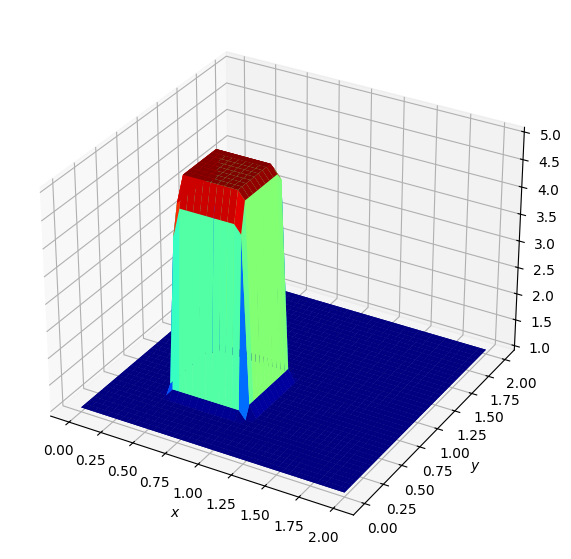

In [ ]:
n = 0
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u_tiempo[n], cmap=cm.jet, rstride=1, cstride=1)
ax.plot_surface(X, Y, v_tiempo[n], cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

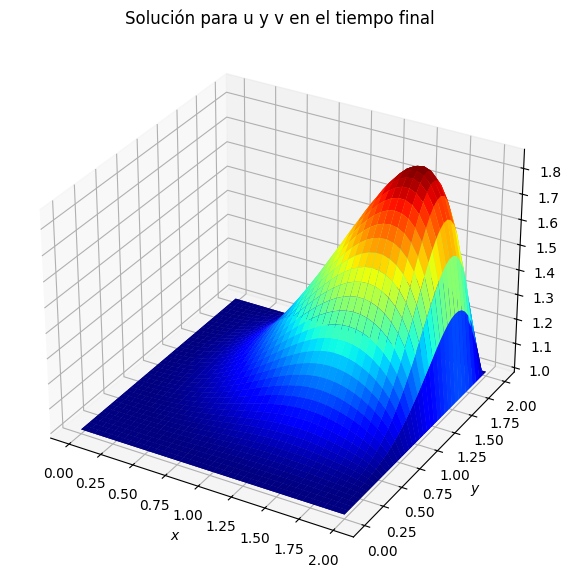

In [ ]:
n = nt
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u_tiempo[n], cmap=cm.jet, rstride=1, cstride=1)
ax.plot_surface(X, Y, v_tiempo[n], cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Solución para u y v en el tiempo final')
plt.savefig('solucion_tf_mdf.jpg')
plt.show()

In [ ]:
t_index = 0 # Example index, adjust as needed
U_slice = u_tiempo[t_index]
V_slice = v_tiempo[t_index]

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Dimensiones de la malla
nx, ny = u.shape
X, Y = np.meshgrid(np.linspace(0, 2, nx), np.linspace(0, 2, ny))
tiempos_muestreados = np.linspace(0, nt, 6, dtype=int)  # Tiempos a visualizar

# Crear figura interactiva
fig = go.Figure()

# Agregar planos de evolución temporal de la temperatura
for t_index in range(6):  # 10 pasos de tiempo
    fig.add_trace(
        go.Surface(
            x=X,
            y=np.full_like(X, t_index),
            z=Y,  # Altura = tiempo
            surfacecolor=u_tiempo[t_index],  # Valores de temperatura
            #colorscale=[[0, 'blue'], [0.5, 'white'], [1, 'red']],
            opacity=0.5,
            showscale=False
        )
    )

# Agregar scatter en tiempos clave
for t_index in tiempos_muestreados:
    fig.add_trace(go.Scatter3d(
        x=X.flatten(), y=np.full_like(X.flatten(), t_index), z=Y.flatten(),
        mode='markers',
        marker=dict(size=3, color=u_tiempo[t_index].flatten()), #colorscale=[[0, 'blue'], [0.5, 'white'], [1, 'red']]),
        name=f"t = {t_index/1000}"
    ))

# Configurar diseño del gráfico
fig.update_layout(
    title="Evolución de u y v en 3D con Scatter",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Tiempo",
        zaxis_title="Y",
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        zaxis=dict(showgrid=True),
        aspectratio=dict(x=1, y=2, z=1)
    ),
    scene_camera=dict(
        eye=dict(x=2, y=-1.3, z=1)
      )  # Ajusta el ángulo de visión
)

# Mostrar la figura
fig.show()

fig.write_image("evolucion_mdf3D.jpg",scale=2)   # JPG

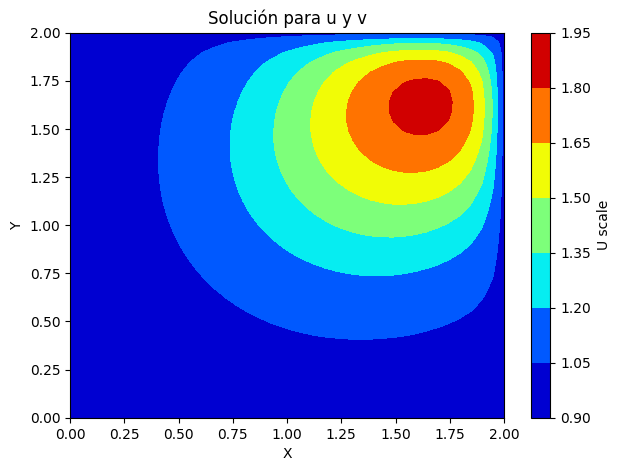

In [ ]:
#nx = 50
#ny = 20
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

X, Y = np.meshgrid(x, y)
plt.figure(figsize=(7,5))
contour= plt.contourf(X,Y,u_tiempo[nt],cmap='jet')
contour= plt.contourf(X,Y,v_tiempo[nt],cmap='jet')
plt.title('Solución para u y v')
plt.xlabel('X')
plt.ylabel('Y')
colorbar= plt.colorbar(contour)
colorbar.set_label('U scale')
plt.savefig('solucion_mdf.jpg')

In [ ]:
np.shape(u_tiempo)

(500, 40, 40)

In [ ]:
# np.savetxt('mdf.txt',u_tiempo[nt])
# np.savetxt('mdf0.txt',u_tiempo[0])

In [ ]:
np.save("u_tiempo.npy", u_tiempo)

**Udemy- Burger's Equation 2D**

In [ ]:
#nt= 20 #steps
#nx=20
#ny=20
nu=0.1
#dt=0.00
dx=2/(nx-1) #from 0 to 2
dy= 2/(ny-1)
x=np.linspace(0,2,nx)
y=np.linspace(0,2,ny)
comb=np.zeros((ny,nx))
comb.shape

(40, 40)

In [ ]:
u= np.zeros((ny,nx))
v= np.zeros((ny,nx))#speed

un= np.zeros((ny,nx))#previous time step
vn= np.zeros((ny,nx))
uf= np.zeros((nt,ny,nx)) #solutions
vf= np.zeros((nt,ny,nx))

In [ ]:
#Initial conditions
u=np.ones((ny,nx))
v=np.ones((ny,nx))
uf=np.ones((nt,ny,nx))
vf=np.ones((nt,ny,nx))
u[int(0.5/dy):int(1/dy+1),int(0.5/dy):int(1/dy+1)]= 5
v[int(0.5/dy):int(1/dy+1),int(0.5/dy):int(1/dy+1)]= 5

uf[0,int(0.5/dy):int(1/dy+1),int(0.5/dy):int(1/dy+1)]= 5
vf[0,int(0.5/dy):int(1/dy+1),int(0.5/dy):int(1/dy+1)]= 5

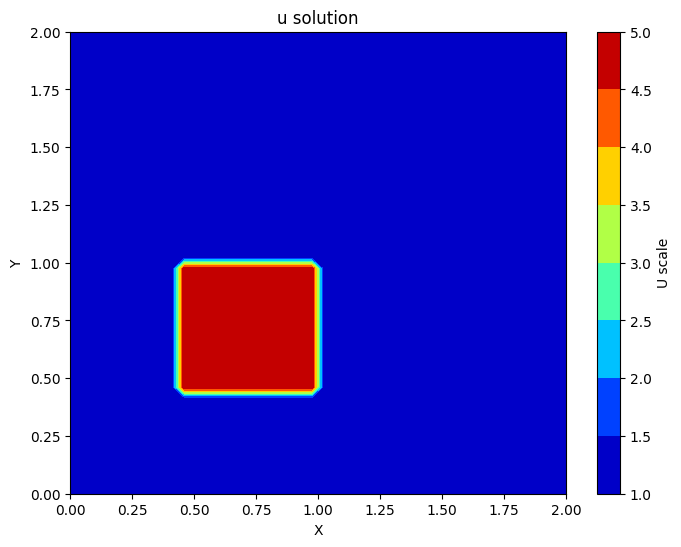

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour= plt.contourf(X,Y,u[:],cmap='jet')
plt.title('u solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar= plt.colorbar(contour)
colorbar.set_label('U scale')

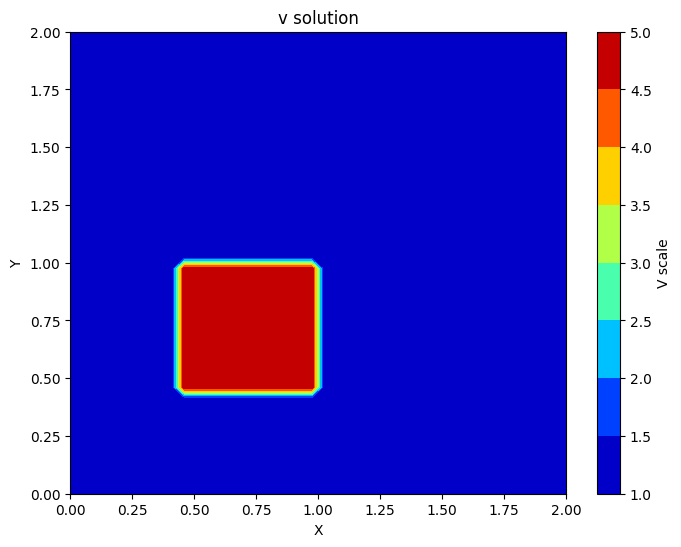

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour= plt.contourf(X,Y,v[:],cmap='jet')
plt.title('v solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar= plt.colorbar(contour)
colorbar.set_label('V scale')

Solve Burguer equation:

In [ ]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            #Discretización de la ecuación
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n,i,j] = u[i,j]
            vf[n,i,j] = v[i,j]
    u[:,0 ] = 1
    u[:,-1] = 1
    u[0,: ] = 1
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1   #Actualización de las condiciones de frontera
    #print(np.shape(uf))

In [ ]:
np.shape(u)

(40, 40)

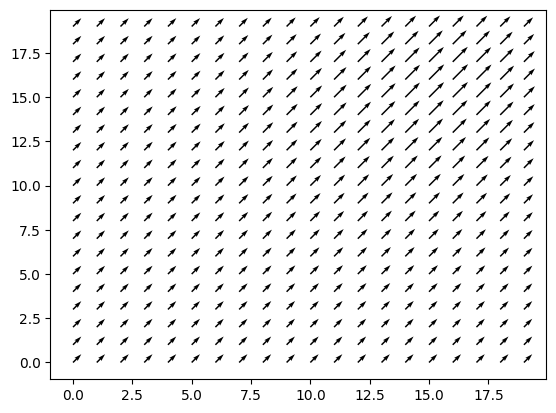

In [ ]:
n=498
plt.quiver(uf[n,::2, ::2], vf[n,::2, ::2])

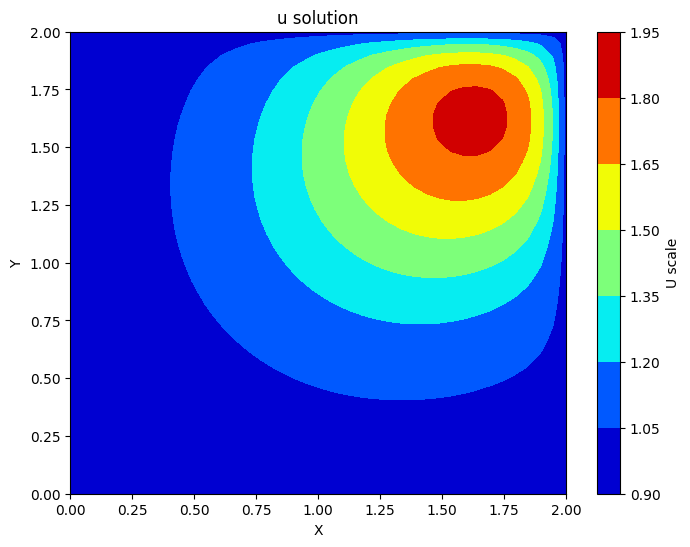

In [ ]:
plt.figure(figsize=(8,6))
contour= plt.contourf(X,Y,u[:],cmap='jet')
contour= plt.contourf(X,Y,v[:],cmap='jet')
plt.title('u solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar= plt.colorbar(contour)
colorbar.set_label('U scale')

In [ ]:
np.shape(uf[-1])

(40, 40)

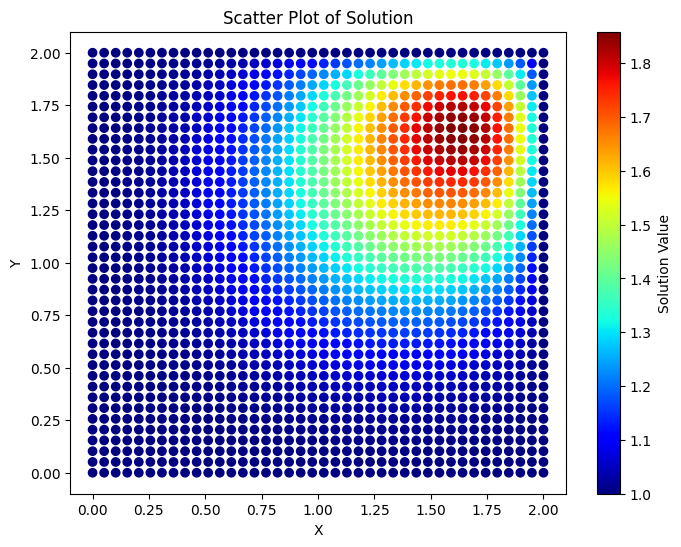

In [ ]:
# prompt: hacer el grafico de scatter para u solution

import matplotlib.pyplot as plt

# Assuming 'u' and 'v' are your solution arrays (from the previous code)
# and 'x' and 'y' are your spatial coordinates

plt.figure(figsize=(8,6))
plt.scatter(X, Y, c=u[:], cmap='jet')  # or v, depending on which you want to plot
plt.title('Scatter Plot of Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Solution Value')
plt.show()

In [ ]:
# prompt: guardar los datos de u en un archivo .txt

# Assuming 'u' is your solution array from the previous code.
np.savetxt("u_data.txt", u)

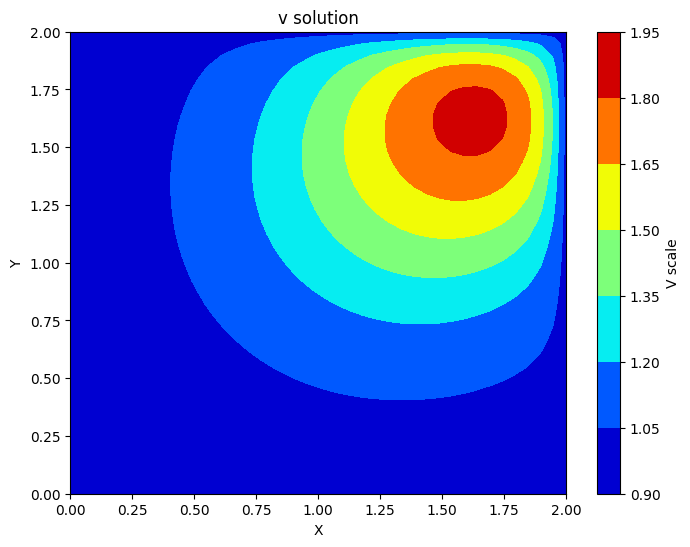

In [ ]:
plt.figure(figsize=(8,6))
contour= plt.contourf(X,Y,v[:],cmap='jet')
plt.title('v solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar= plt.colorbar(contour)
colorbar.set_label('V scale')

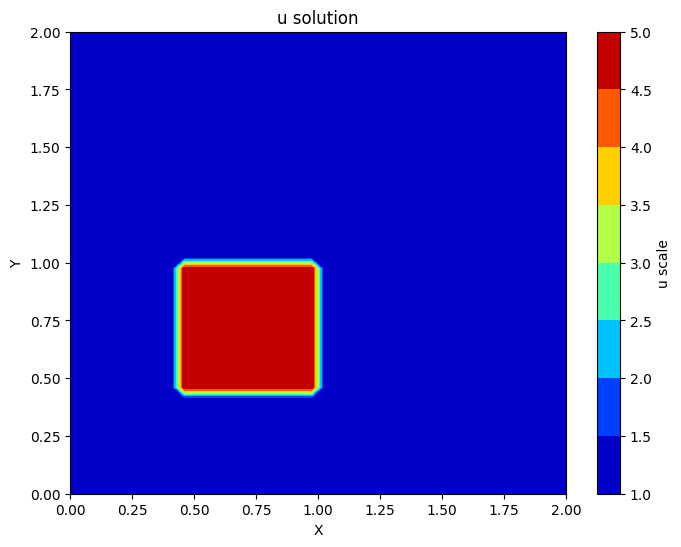

In [ ]:
X, Y = np.meshgrid(x,y)

#set the time as you like
u = uf[0,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

In [ ]:
np.savetxt('data.txt',u)